## Assignment No : 1
# Undersatnding the data
# What is the problem statement ?
With the help of Rewiew and Rating helping customer in buying products on Amazon website.There are some advantages they are as follows :
Customer Purchase Prediction, Sentiment Analysis of Product Reviews, Product Recommendation System, Fraud Detection


In [ ]:
#number array
import numpy as np
#pandas  for data
import pandas as pd

#for ploting
import matplotlib.pyplot as plt
import seaborn as sns

#for string function
import string

#regular expression
import re

#NLTK tools for text analytics
import nltk

from tqdm import trange

# used for tokenization
from nltk import tokenize
# used for stop word
from nltk.corpus import stopwords
#used for lemmatization
from nltk.stem import WordNetLemmatizer
#used for frequency distrubution
from nltk.probability import FreqDist
from collections import Counter
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer

 ## Identify the Bahaviour of Data</h3>
<b>Task need to perform :- </b>
<li>Read the file and findout the different type of data is present in the data sataset. </li>
<li>Identify the total number of rows and columns in the dataset</li>
<li>Identify the  purpose of each column in the dataset. Make a small table which has column name of variable , datatype and purpose </li>
<li> Identify the  dependent variable and independent variable</li>
<li> Observe the pattern of data </li>


In [ ]:
#read the file
data = pd.read_csv('/content/Amazon Review.csv')
data.head(10)

,Review,Rating
0,"Purchased this for my device, it worked as adv...",5
1,it works as expected. I should have sprung for...,4
2,This think has worked out great.Had a diff. br...,5
3,"Bought it with Retail Packaging, arrived legit...",5
4,It's mini storage. It doesn't do anything els...,5
5,I have it in my phone and it never skips a bea...,5
6,It's hard to believe how affordable digital ha...,5
7,Works in a HTC Rezound. Was running short of ...,5
8,"in my galaxy s4, super fast card, and am total...",5
9,I like this SD Card because it can take music ...,5


# Define Problem Statement


In [ ]:
data.info()
# the output suggest total two columns are available
# Review  -- its type is object
# Rating -- its type is int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  4913 non-null   object
 1   Rating  4913 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 76.9+ KB


In [ ]:
data.shape
# total  4913 rows are in the file
# two columns are available in the file|

(4913, 2)

In [ ]:
#statistic description
data.describe()

,Rating
count,4913.000000
mean,4.587625
std,0.996995
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
data.head()
## It shows the 1st 5 frows in our dataset

,Review,Rating
0,"Purchased this for my device, it worked as adv...",5
1,it works as expected. I should have sprung for...,4
2,This think has worked out great.Had a diff. br...,5
3,"Bought it with Retail Packaging, arrived legit...",5
4,It's mini storage. It doesn't do anything els...,5


In [ ]:
data['Rating'].value_counts()

,count
Rating,
5,3921
4,526
1,244
3,142
2,80


# Visualize the percent wice rating


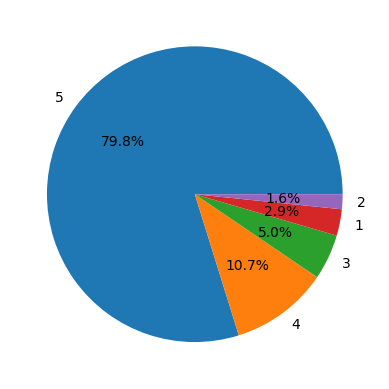

In [ ]:
plt.pie(data['Rating'].value_counts(), labels=data['Rating'].unique().tolist(), autopct='%1.1f%%')
plt.show()
# As we can see there are highest percentage is 79.8%
# and lowest percentage is 1.6%

In [ ]:
data.dtypes
# There are two coloums 1 is Review there data type are object
# another is Rating and there data type are integer

,0
Review,object
Rating,int64


In [ ]:
data.columns.values

array(['Review', 'Rating'], dtype=object)

# From the Problem Statement
## Independent variable is Review
## Dependant variable is rating


# Assignment No : 2
## Data Cleaning
## In data cleaning part we are removing HTML Chracters, removing URL, Removing mentions, Removing Hastags, Handaling Contractions, Removing Extra White Space,Converting to lowercase, Remove Punchuations.

In [ ]:
import re
import string
import html # Importing the html module
from html.parser import HTMLParser
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def clean_review(review):
    """
    Cleans a single review string.

    Args:
        review (str): The review text.

    Returns:
        str: The cleaned review text.
    """

    # 1. Escaping HTML characters
    review = html.unescape(review) # Using html.unescape() instead of HTMLParser().unescape()

    # 2. Removing URLs
    review = re.sub(r'http\S+', '', review)

    # 3. Removing mentions (@username)
    review = re.sub(r'@\w+', '', review)

    # 4. Removing hashtags (#hashtag)
    review = re.sub(r'#\w+', '', review)

    # 5. Handling contractions (e.g., "don't" -> "do not")
    # This step requires a contractions dictionary or library, and is omitted for brevity.

    # 6. Removing extra whitespaces
    review = ' '.join(review.split())

    # 7. Converting to lowercase
    review = review.lower()

    # 8. Removing punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))

    return review

# Example usage with a list of reviews:
#reviews = [
 #  "I loved this product! It's amazing. #GreatProduct",
  #  "This was terrible. Don't buy it. @BadCompany",
   # "It was okay, but could be better. http://example.com",
#]

data['Review'] = data['Review'].apply(clean_review)

print("cleaned_review:\n", data['Review'])

cleaned_review:
 0       purchased this for my device it worked as adve...
1       it works as expected i should have sprung for ...
2       this think has worked out greathad a diff bran...
3       bought it with retail packaging arrived legit ...
4       its mini storage it doesnt do anything else an...
                              ...                        
4908    i bought this sandisk 16gb class 10 to use wit...
4909    used this for extending the capabilities of my...
4910    great card that is very fast and reliable it c...
4911    good amount of space for the stuff i want to d...
4912    ive heard bad things about this 64gb micro sd ...
Name: Review, Length: 4913, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#Assignment No : 3
 Text Normalization



In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

###1) Remove Stopwords
###2) Tokenization
###3) Lemmatization

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Download 'punkt' resource along with others
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


def normalize_review(review):
    """Normalizes a single review string."""

    # Tokenization: Split the review into individual words.
    tokens = nltk.word_tokenize(review)

    # Stop word removal: Remove common words that don't carry much meaning.
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lemmatization: Reduce words to their base form.
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the normalized tokens back into a string.
    normalized_review = ' '.join(tokens)

    return normalized_review

# Assuming your data is already in a DataFrame named 'data'
#df = data  # Rename 'data' to 'df'

# Apply the normalization function to the 'Review' column
data['normalized_review'] = data['Review'].apply(normalize_review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data.head()

,Review,Rating,normalized_review,expanded_review,pos_tags,entities,dependencies,00,000,00128,...,zl,zone,zoning,zoom,zte,ztpad,zumo,zune,zunehd,word_count
0,"Purchased this for my device, it worked as adv...",5,"Purchased device , worked advertised . never m...","Purchased this for my device, it worked as adv...","[(Purchased, VERB), (this, DET), (for, ADP), (...",[],"[(Purchased, advcl, worked), (this, dobj, Purc...",0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31
1,it works as expected. I should have sprung for...,4,work expected . sprung higher capacity . think...,it works as expected. I should have sprung for...,"[(it, PRON), (works, VERB), (as, ADP), (expect...",[],"[(it, nsubj, works), (works, ROOT, works), (as...",0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31
2,This think has worked out great.Had a diff. br...,5,think worked great.Had diff . bran 64gb card w...,This think has worked out great.Had a differen...,"[(This, DET), (think, NOUN), (has, VERB), (wor...","[(64, CARDINAL), (3 months, DATE), (S3, CARDIN...","[(This, det, think), (think, nsubj, worked), (...",0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66
3,"Bought it with Retail Packaging, arrived legit...",5,"Bought Retail Packaging , arrived legit , oran...","Bought it with Retail Packaging, arrived legit...","[(Bought, VERB), (it, PRON), (with, ADP), (Ret...","[(Retail Packaging, PERSON), (legit, PERSON), ...","[(Bought, ROOT, Bought), (it, dobj, Bought), (...",0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52
4,It's mini storage. It doesn't do anything els...,5,'s mini storage . n't anything else 's suppose...,It is mini storage. It does not do anything e...,"[(It, PRON), ('s, VERB), (mini, ADJ), (storage...","[(Microsoft, ORG), (64, DATE), (128, CARDINAL)...","[(It, nsubj, 's), ('s, ROOT, 's), (mini, amod,...",0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51


In [ ]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 49.1 MB/s eta 0:00:00


In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()
data['corrected_review'] = data['Review'].apply(lambda text: " ".join([spell.correction(word) or word for word in text.split()]))

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.0 MB/s eta 0:00:00


## Contractions

In [ ]:
import contractions

# Using the contractions library:
data['expanded_review'] = data['Review'].apply(contractions.fix)

# Or, using a custom function:
data['expanded_review'] = data['Review'].apply(lambda text: expand_contractions(text, contractions_dict))

In [ ]:
import contractions
import pandas as pd

# Sample DataFrame (Replace with your actual data)
# df = pd.DataFrame({'Review': ["I'm can't wouldn't", "She's ain't gonna"]})

data['expanded_review'] = data['Review'].apply(contractions.fix)
print(data)

                                                 Review  Rating  \
0     Purchased this for my device, it worked as adv...       5   
1     it works as expected. I should have sprung for...       4   
2     This think has worked out great.Had a diff. br...       5   
3     Bought it with Retail Packaging, arrived legit...       5   
4     It's mini storage.  It doesn't do anything els...       5   
...                                                 ...     ...   
4908  I bought this Sandisk 16GB Class 10 to use wit...       1   
4909  Used this for extending the capabilities of my...       5   
4910  Great card that is very fast and reliable. It ...       5   
4911  Good amount of space for the stuff I want to d...       5   
4912  I've heard bad things about this 64gb Micro SD...       5   

                                      normalized_review  \
0     Purchased device , worked advertised . never m...   
1     work expected . sprung higher capacity . think...   
2     think worked

# Assignment No : 4
## Evaluating and Refining Text Cleaning and Normalization
## In that we have to perform word count, Vocabulary size, Average word length, Wordcloud

In [ ]:
import pandas as pd

# Sample DataFrame (Replace with your actual data)
df = pd.DataFrame({'Review': ["I'm can't wouldn't", "She's ain't gonna", "This is a test"]})

# Apply word count using a lambda function and the 'wc' command
data['word_count'] = data['Review'].apply(lambda text: len(text.split()))

print(data)

                                                 Review  Rating  \
0     Purchased this for my device, it worked as adv...       5   
1     it works as expected. I should have sprung for...       4   
2     This think has worked out great.Had a diff. br...       5   
3     Bought it with Retail Packaging, arrived legit...       5   
4     It's mini storage.  It doesn't do anything els...       5   
...                                                 ...     ...   
4908  I bought this Sandisk 16GB Class 10 to use wit...       1   
4909  Used this for extending the capabilities of my...       5   
4910  Great card that is very fast and reliable. It ...       5   
4911  Good amount of space for the stuff I want to d...       5   
4912  I've heard bad things about this 64gb Micro SD...       5   

                                      normalized_review  \
0     Purchased device , worked advertised . never m...   
1     work expected . sprung higher capacity . think...   
2     think worked

In [ ]:
import pandas as pd

# Sample DataFrame (Replace with your actual data)
#df = pd.DataFrame({'Review': ["I'm can't wouldn't", "She's ain't gonna", "This is a test"]})

# Calculate the total word count for the 'Review' column
total_word_count = data['Review'].apply(lambda text: len(text.split())).sum()

print(f"Total word count for all reviews: {total_word_count}")

Total word count for all reviews: 247922


In [ ]:
import pandas as pd

# Sample DataFrame (Replace with your actual data)
# df = pd.DataFrame({'Review': ["I'm can't wouldn't", "She's ain't gonna", "This is a test"]})

# 1. Combine all reviews into a single string
all_reviews_text = ' '.join(data['Review'].astype(str).tolist())

# 2. Split the text into individual words
words = all_reviews_text.split()

# 3. Create a set of unique words to get the vocabulary size
vocabulary_size = len(set(words))

print(f"Vocabulary size: {vocabulary_size}")

Vocabulary size: 19443


In [ ]:
!pip install wordcloud

Average word length: 4.31


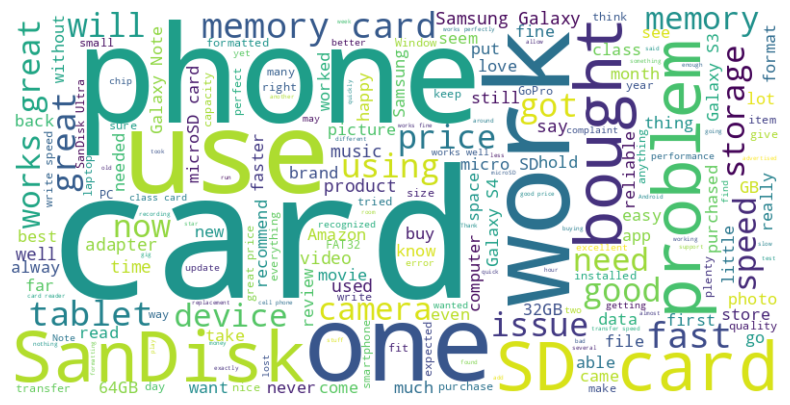

In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Sample DataFrame (Replace with your actual data)
# df = pd.DataFrame({'Review': ["This is a good product", "I love this item", "It's amazing and I highly recommend it"]})

# 1. Combine all reviews into a single string
all_reviews_text = ' '.join(data['Review'].astype(str).tolist())

# 2. Calculate average word length
words = all_reviews_text.split()
average_word_length = np.mean([len(word) for word in words])
print(f"Average word length: {average_word_length:.2f}")

# 3. Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(all_reviews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Assignment No : 5
## Other task on data

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

# POS

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Sample DataFrame (Replace with your actual data)
# df = pd.DataFrame({'Review': ["This is a good product", "I love this item", "It's amazing and I highly recommend it"]})

# 1. Function to perform POS tagging on a text
def pos_tag_text(text):
    tokens = word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens, tagset='universal')  # Use 'universal' tagset
    return tagged_tokens

# 2. Apply POS tagging to the 'Review' column
data['pos_tags'] = data['Review'].apply(pos_tag_text)

print(data)

                                                 Review  Rating  \
0     Purchased this for my device, it worked as adv...       5   
1     it works as expected. I should have sprung for...       4   
2     This think has worked out great.Had a diff. br...       5   
3     Bought it with Retail Packaging, arrived legit...       5   
4     It's mini storage.  It doesn't do anything els...       5   
...                                                 ...     ...   
4908  I bought this Sandisk 16GB Class 10 to use wit...       1   
4909  Used this for extending the capabilities of my...       5   
4910  Great card that is very fast and reliable. It ...       5   
4911  Good amount of space for the stuff I want to d...       5   
4912  I've heard bad things about this 64gb Micro SD...       5   

                                      normalized_review  \
0     Purchased device , worked advertised . never m...   
1     work expected . sprung higher capacity . think...   
2     think worked

# Named Entity Recogniztion

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import spacy

# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# Sample DataFrame (Replace with your actual data)
# df = pd.DataFrame({'Review': ["Apple is looking at buying U.K. startup for $1 billion",
                              #"Autonomous cars shift insurance liability toward manufacturers",
                              #"San Francisco considers banning sidewalk delivery robots"]})

# Function to perform NER and extract entities
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply NER to the 'Review' column
data['entities'] = data['Review'].apply(extract_entities)

print(data)

                                   Review   amazing       and      good  \
0                  This is a good product  0.000000  0.000000  0.528635   
1                        I love this item  0.000000  0.000000  0.000000   
2  It's amazing and I highly recommend it  0.353553  0.353553  0.000000   

     highly        is        it      item      love   product  recommend  \
0  0.000000  0.528635  0.000000  0.000000  0.000000  0.528635   0.000000   
1  0.000000  0.000000  0.000000  0.622766  0.622766  0.000000   0.000000   
2  0.353553  0.000000  0.707107  0.000000  0.000000  0.000000   0.353553   

      this  
0  0.40204  
1  0.47363  
2  0.00000  


# Dependency Grammer

In [ ]:
import pandas as pd
import spacy

# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# Sample DataFrame (Replace with your actual data)
# df = pd.DataFrame({'Review': ["This is a good product", "I love this item", "It's amazing and I highly recommend it"]})

# Function to perform dependency parsing and extract relationships
def extract_dependencies(text):
    doc = nlp(text)
    dependencies = []
    for token in doc:
        dependencies.append((token.text, token.dep_, token.head.text))
    return dependencies

# Apply dependency parsing to the 'Review' column
data['dependencies'] = data['Review'].apply(extract_dependencies)

print(data)

                                                 Review  Rating  \
0     Purchased this for my device, it worked as adv...       5   
1     it works as expected. I should have sprung for...       4   
2     This think has worked out great.Had a diff. br...       5   
3     Bought it with Retail Packaging, arrived legit...       5   
4     It's mini storage.  It doesn't do anything els...       5   
...                                                 ...     ...   
4908  I bought this Sandisk 16GB Class 10 to use wit...       1   
4909  Used this for extending the capabilities of my...       5   
4910  Great card that is very fast and reliable. It ...       5   
4911  Good amount of space for the stuff I want to d...       5   
4912  I've heard bad things about this 64gb Micro SD...       5   

                                      normalized_review  \
0     Purchased device , worked advertised . never m...   
1     work expected . sprung higher capacity . think...   
2     think worked

# Assignment No : 6

In [ ]:
!pip install scikit-learn

##Bag-of-Words (BoW)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Sample DataFrame (Replace with your actual data)
# df = pd.DataFrame({'Review': ["This is a good product", "I love this item", "It's amazing and I highly recommend it"]})

# 1. Create a CountVectorizer object
vectorizer = CountVectorizer()

# 2. Fit the vectorizer to your data
vectorizer.fit(data['Review'])

# 3. Transform your data into a BoW representation
bow_matrix = vectorizer.transform(data['Review'])

# 4. Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# 5. Create a DataFrame from the BoW matrix
bow_data = pd.DataFrame(bow_matrix.toarray(), columns=feature_names, index=data.index)

# 6. Concatenate the BoW DataFrame with the original DataFrame
data = pd.concat([data, bow_data], axis=1)

print(data)

                                                 Review  Rating  \
0     Purchased this for my device, it worked as adv...       5   
1     it works as expected. I should have sprung for...       4   
2     This think has worked out great.Had a diff. br...       5   
3     Bought it with Retail Packaging, arrived legit...       5   
4     It's mini storage.  It doesn't do anything els...       5   
...                                                 ...     ...   
4908  I bought this Sandisk 16GB Class 10 to use wit...       1   
4909  Used this for extending the capabilities of my...       5   
4910  Great card that is very fast and reliable. It ...       5   
4911  Good amount of space for the stuff I want to d...       5   
4912  I've heard bad things about this 64gb Micro SD...       5   

                                      normalized_review  \
0     Purchased device , worked advertised . never m...   
1     work expected . sprung higher capacity . think...   
2     think worked

In [ ]:
!pip install scikit-learn

## TF-IDF (Term Frequency-Inverse Document Frequency)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample DataFrame (Replace with your actual data)
# df = pd.DataFrame({'Review': ["This is a good product", "I love this item", "It's amazing and I highly recommend it"]})

# 1. Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# 2. Fit the vectorizer to your data
vectorizer.fit(data['Review'])

# 3. Transform your data into a TF-IDF representation
tfidf_matrix = vectorizer.transform(data['Review'])

# 4. Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# 5. Create a DataFrame from the TF-IDF matrix
tfidf_data = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names, index=data.index)

# 6. Concatenate the TF-IDF DataFrame with the original DataFrame
data = pd.concat([data, tfidf_data], axis=1)

print(data)

                                                 Review  Rating  \
0     Purchased this for my device, it worked as adv...       5   
1     it works as expected. I should have sprung for...       4   
2     This think has worked out great.Had a diff. br...       5   
3     Bought it with Retail Packaging, arrived legit...       5   
4     It's mini storage.  It doesn't do anything els...       5   
...                                                 ...     ...   
4908  I bought this Sandisk 16GB Class 10 to use wit...       1   
4909  Used this for extending the capabilities of my...       5   
4910  Great card that is very fast and reliable. It ...       5   
4911  Good amount of space for the stuff I want to d...       5   
4912  I've heard bad things about this 64gb Micro SD...       5   

                                      normalized_review  \
0     Purchased device , worked advertised . never m...   
1     work expected . sprung higher capacity . think...   
2     think worked